%pip install seaborn

In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("husl", 8)

In [41]:
df=pd.read_csv("Dataset of Youtube Channels.csv")
df.head()

,Youtuber,Id,Uploads,Subscribers,Video Views,Country,Account Created
0,Edureka!,@edurekaIN,8500,3.7M,366361662,India,"Jun 29th, 2012"
1,Crash Course,@crashcourse,1400,14.5M,1780876746,United States,"May 20th, 2006"
2,Alura,@alura,985,352K,20420591,Brazil,"Jan 21st, 2014"
3,K team,@A7K team,934,181K,26682748,Vietnam,"Oct 22nd, 2014"
4,Tensorflow,@TensorFlow,570,546K,98005120,United States,"Dec 22nd, 2017"


Data Description :- 

    1. youtuber – Name of the YouTube channel
    2. id – Channel ID
    3. uploads – number of videos uploaded on the channels
    4. subscribers – of subscribers of the channel
    5. video views – total count of all videos in the channel
    6. country - the two-letter country abbreviation
    7. account created – date of creation of the channel
    8. estimated monthly income - This is the range of estimated monthly income based on CPM, or cost per mille, and shows how much advertisers pay

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Youtuber         129 non-null    object
 1   Id               129 non-null    object
 2   Uploads          129 non-null    int64 
 3   Subscribers      129 non-null    object
 4   Video Views      129 non-null    int64 
 5   Country          129 non-null    object
 6   Account Created  129 non-null    object
dtypes: int64(2), object(5)
memory usage: 7.2+ KB


Data Cleaning 🧹


Lets start with subscribers coloumn :

In [43]:
subs_arr = df["Subscribers"]
new_subs = []
for i in range(len(subs_arr)):
    # print(subs_arr[i][-1])
    prefix = subs_arr[i][-1]
    sub_count = subs_arr[i][:-1]
    if prefix == "M":
        new_subs.append(float(sub_count) * 1000000)
    if prefix == "K":
        new_subs.append(float(sub_count) * 1000)        

df_copy = df.copy()
df_copy["Subscribers"] = new_subs

Now, lets see the year in which channel was created 📆

In [44]:
yrs_arr = df["Account Created"]
new_yrs = []
for i in range(len(yrs_arr)):
    new_yrs.append(yrs_arr[i].split(" ", -1)[-1])
    # break

df_copy["year_created"] = new_yrs

Rename and change the data type of the coloumns 🤨

In [45]:
df_copy = df_copy.rename(columns={"Video Views": "Total_veiws"})
df_copy['Subscribers'] = df_copy['Subscribers'].astype(int)


Drop the unnecessary coloumns

In [46]:
df_copy.drop(['Account Created'], axis=1, inplace=True)

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Youtuber      129 non-null    object
 1   Id            129 non-null    object
 2   Uploads       129 non-null    int64 
 3   Subscribers   129 non-null    int32 
 4   Total_veiws   129 non-null    int64 
 5   Country       129 non-null    object
 6   year_created  129 non-null    object
dtypes: int32(1), int64(2), object(4)
memory usage: 6.7+ KB


In [48]:
df_copy.describe()

,Uploads,Subscribers,Total_veiws
count,129.000000,1.290000e+02,1.290000e+02
mean,1065.891473,9.227763e+05,1.216044e+08
std,1897.824376,1.913243e+06,3.573599e+08
min,3.000000,1.000000e+02,2.500000e+03
25%,141.000000,4.590000e+04,3.430000e+06
50%,304.000000,2.100000e+05,1.270162e+07
75%,1100.000000,8.810000e+05,9.163820e+07
max,13000.000000,1.450000e+07,3.264989e+09


Data Visualization 🤪

In [49]:
df_copy.head()

,Youtuber,Id,Uploads,Subscribers,Total_veiws,Country,year_created
0,Edureka!,@edurekaIN,8500,3700000,366361662,India,2012
1,Crash Course,@crashcourse,1400,14500000,1780876746,United States,2006
2,Alura,@alura,985,352000,20420591,Brazil,2014
3,K team,@A7K team,934,181000,26682748,Vietnam,2014
4,Tensorflow,@TensorFlow,570,546000,98005120,United States,2017


Youtube Channels of different countires

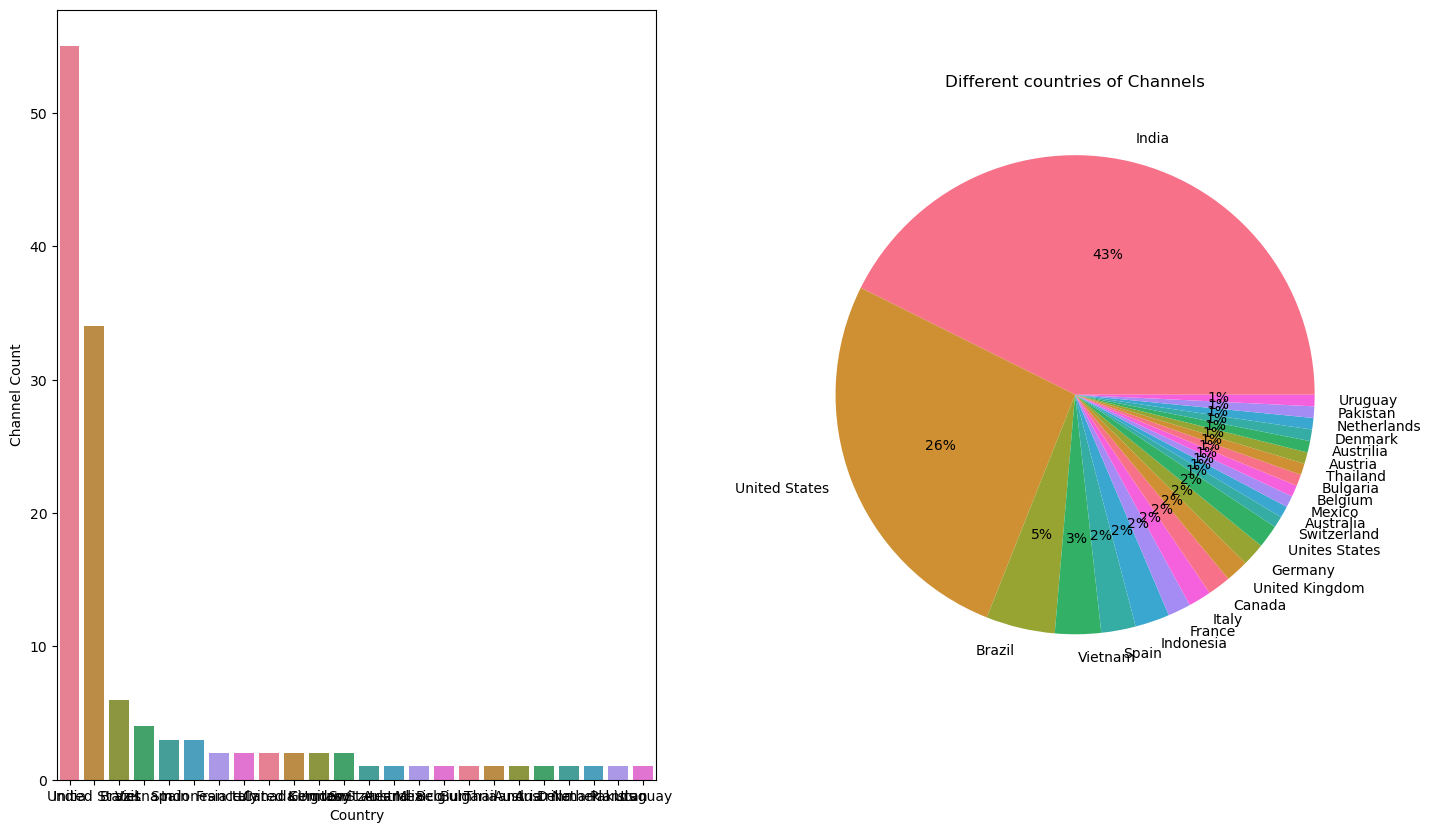

In [50]:
plt.figure(figsize=(17, 10))
countries = df_copy["Country"].value_counts()

plt.subplot(1,2,1)
sns.barplot(data=df_copy, y=countries, x=df_copy["Country"].unique(), palette=palette)
plt.xlabel('Country')
plt.ylabel('Channel Count')

plt.subplot(1, 2, 2)

plt.pie(data=df_copy, x=countries, labels=df_copy["Country"].unique(), autopct='%.0f%%', colors=palette)
plt.title("Different countries of Channels")


plt.show()

Growth of Channels

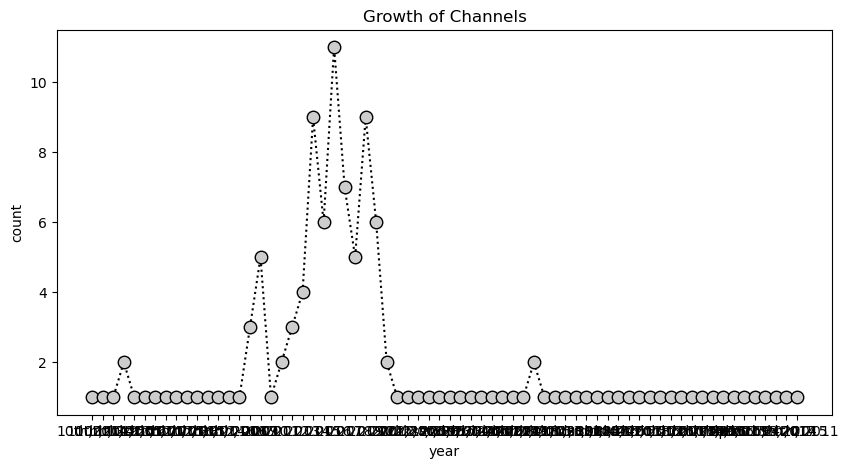

In [51]:
plt.figure(figsize=(10, 5))

year_count = df_copy.groupby(['year_created']).count()
year_count.iloc[:, 0].values

plt.plot(year_count.iloc[:, 0].index, year_count.iloc[:, 0].values, linestyle = 'dotted', marker="o", color='#000', 
         markerfacecolor='#cdcdcd', markersize=9)
plt.xlabel('year')
plt.ylabel('count')
plt.title("Growth of Channels")

plt.show()

Subscribers count different of Channels

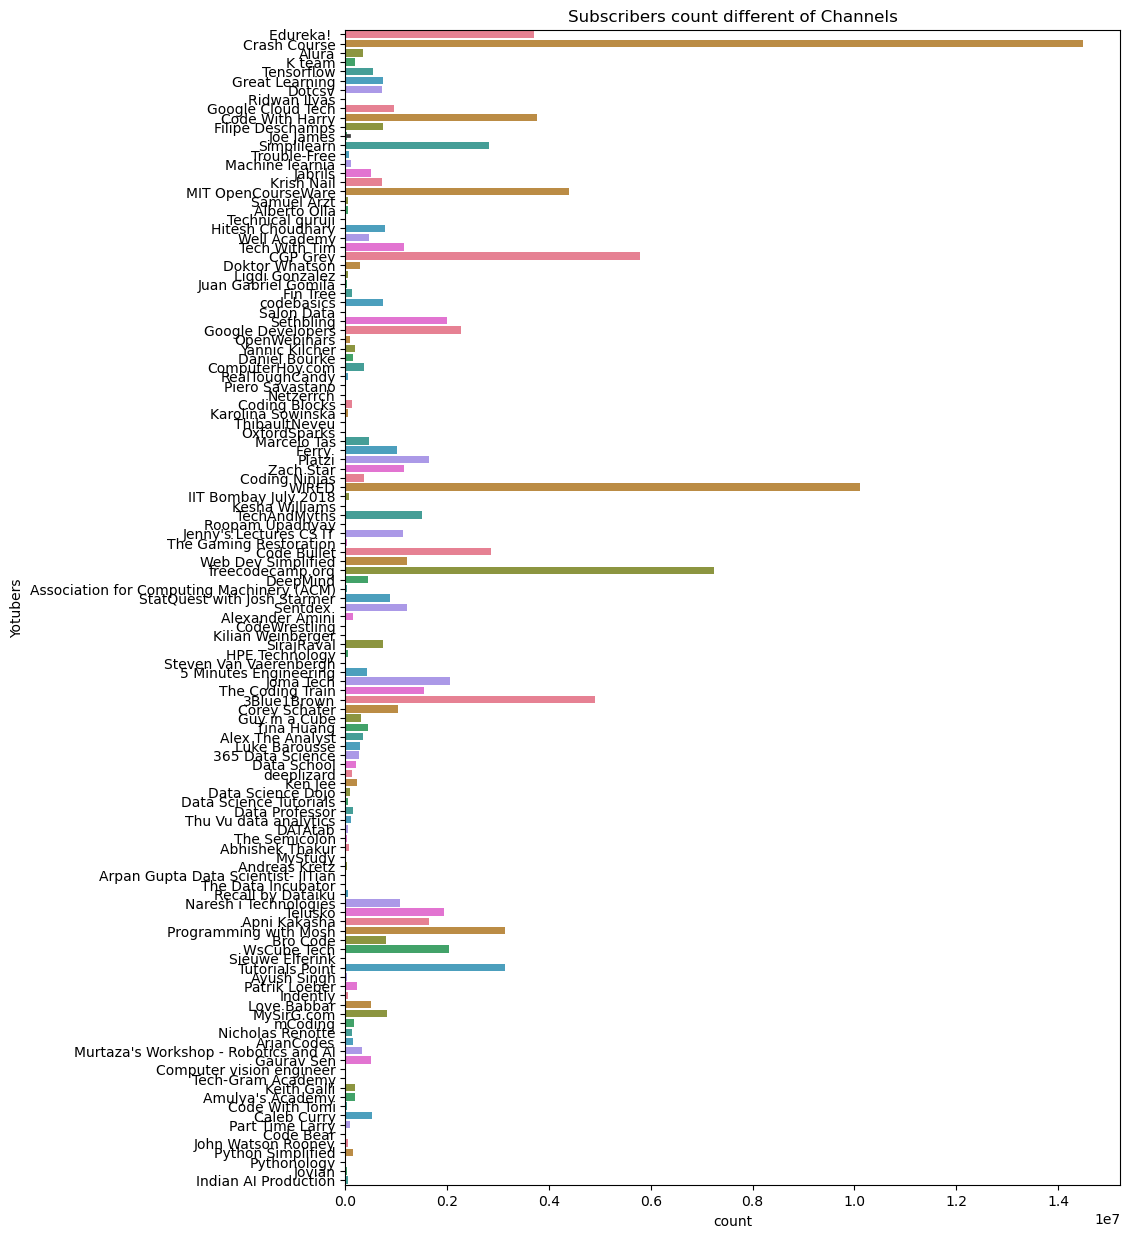

In [52]:
plt.figure(figsize=(10,15))

sns.barplot(x=df_copy['Subscribers'], y=df_copy['Youtuber'], palette=palette)
plt.xlabel('count')
plt.ylabel('Yotubers')
plt.title("Subscribers count different of Channels")

plt.show()

Correlation

In [53]:
df_copy.corr().style.background_gradient(cmap=plt.cm.cubehelix)

,Uploads,Subscribers,Total_veiws
Uploads,1.000000,0.343033,0.311716
Subscribers,0.343033,1.000000,0.435624
Total_veiws,0.311716,0.435624,1.000000


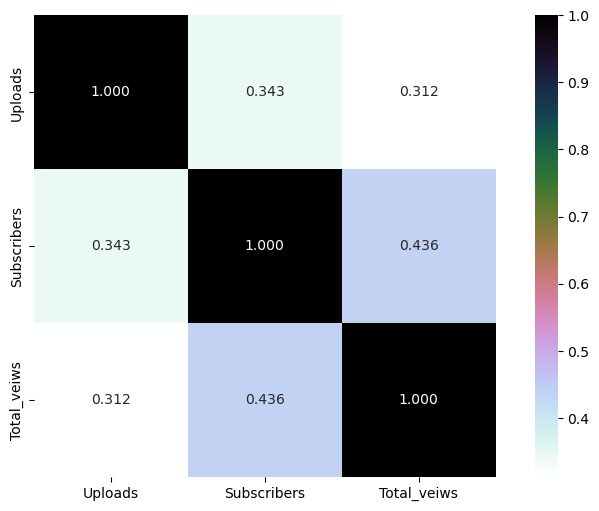

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df_copy.corr(), annot = True, cmap=plt.cm.cubehelix_r, fmt='.3f', square=True)
plt.show()

Relationships between variables within a dataset by using the Pairplot

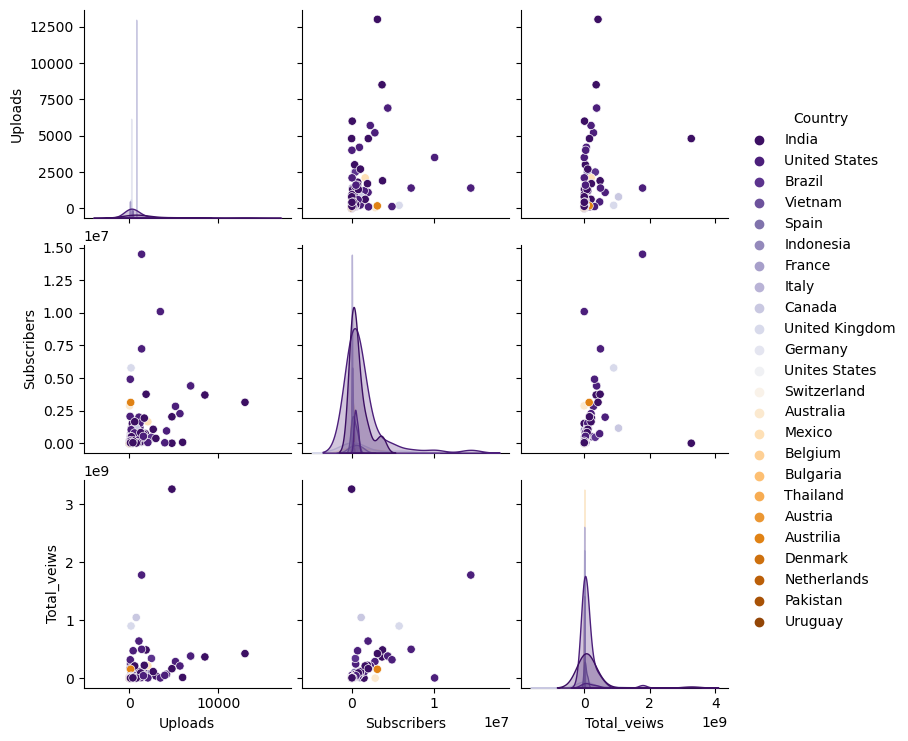

In [56]:
sns.pairplot(df_copy, hue='Country', palette="PuOr_r")
plt.show()